In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [175]:
data = pd.read_csv('B-train.csv')
dataTest = pd.read_csv('B-test.csv')


In [176]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [178]:
dataTest

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.69,-120.50,-5.93,7.43,-16.28,-9.26,96.68,10510.35,B_01
1,102.08,74.69,-4.95,-2.20,-4.95,NaN,27.30,36952.37,B_02
2,NaN,49.86,1.00,-5.35,0.72,-9.81,NaN,24768.46,B_03
3,49.39,-101.88,8.69,-7.54,-11.28,4.61,-15.11,NaN,B_04
4,140.49,59.99,0.05,6.55,NaN,-0.42,109.93,2603.04,B_05
5,54.08,NaN,11.00,-16.44,5.31,17.83,-90.67,5.20,B_06
6,106.48,-50.55,16.47,NaN,1.34,-11.53,138.03,1753.93,B_07
7,-83.82,-104.84,NaN,-13.70,10.19,-2.51,-34.02,7494.36,B_08
8,147.15,9.14,-3.06,1.97,8.14,26.99,37.34,249.96,B_09
9,8.68,-207.09,-4.37,-10.22,-5.01,10.57,-24.65,20.43,B_10


In [179]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      9 non-null      float64
 1   x2      9 non-null      float64
 2   x3      9 non-null      float64
 3   x4      9 non-null      float64
 4   x5      9 non-null      float64
 5   x6      9 non-null      float64
 6   x7      9 non-null      float64
 7   x8      9 non-null      float64
 8   y       10 non-null     object 
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


In [180]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in column:
    data[i].fillna(data[i].mean(),inplace=True)


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [182]:
columnT = ['x1','x2','x3','x4','x5','x6','x7','x8']
for k in columnT:
    dataTest[k].fillna(dataTest[k].mean(),inplace=True)

In [183]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   x6      10 non-null     float64
 6   x7      10 non-null     float64
 7   x8      10 non-null     float64
 8   y       10 non-null     object 
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


<AxesSubplot:>

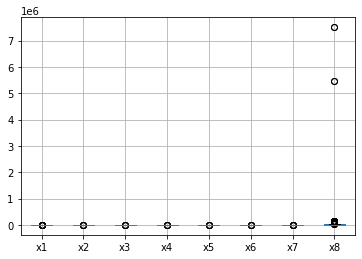

In [184]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]
X.boxplot()

In [185]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for j in range(len(data)):
        if(data[i][j] < lower_bound ):
            data[i][j] = lower_bound
        elif(data[i][j] > upper_bound ):
            data[i][j] = upper_bound
        inplace=True


<AxesSubplot:>

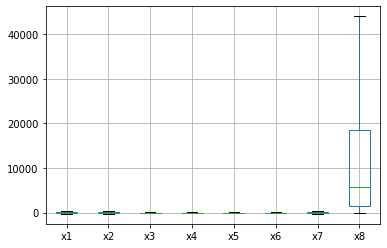

In [186]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]
X.boxplot()

In [187]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

In [188]:
Xt = dataTest[["x1","x2","x3","x4","x5","x6","x7","x8"]]

In [189]:
X_train = X
X_test = Xt
y_train = Y

In [190]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
# print("len(y_test) : ", len(y_test))

len(X_train) :  190
len(X_test) :  10
len(y_train) :  190


In [191]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [192]:
y_pred = lm.predict(X_test)
y_pred

array([[-5.07994226],
       [ 2.18364442],
       [ 2.6681655 ],
       [-3.78509073],
       [ 0.50717571],
       [-0.06485587],
       [-3.61722149],
       [ 2.80820158],
       [-0.99859284],
       [-6.16274431]])

In [193]:
# y_test - y_pred

In [194]:
# m = lm.coef_
# c = lm.intercept_
# print('m = ',m)
# print('c = ',c)
# print('r^2 = ',r2_score(y_test, y_pred))